# News Category Classification

## Extracting news articles fron API

In [1]:
pip install newsapi-python

  Obtaining dependency information for newsapi-python from https://files.pythonhosted.org/packages/74/47/e3b099102f0c826d37841d2266e19f1568dcf58ba86e4c6948e2a124f91d/newsapi_python-0.2.7-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [56]:

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
import requests
import pandas as pd

# Define your news API key
news_api_key = '35a4dfca8ad64a2bb1a86ac1bd279b2e'

# Define the categories you want to fetch news from
categories = ['Business', 'Technology', 'Entertainment', 'Sports', 'Science', 'Health']

def get_news(category):
    url = f'https://newsapi.org/v2/top-headlines?country=us&category={category}&apiKey={news_api_key}&pageSize=100'
    response = requests.get(url)
    articles = response.json().get('articles', [])
    
    if not articles:
        print(f"No articles found for category: {category}")
        return None

    summarized_articles = []
    for article in articles:
        news_id = article['url']  # Unique news ID
        title = article['title']
        
        # Use the title as news text
        content = article.get('content') or article.get('description') or article.get('title') or ""
        
        summarized_articles.append({
            'category': category,
            'news_id': news_id,
            'news_text': content,  # Use the title as news text
            'url': article['url'],
            'image_url': article.get('urlToImage')
        })

    # Convert the list of articles into a DataFrame
    df = pd.DataFrame(summarized_articles)
    return df

# Initialize an empty list to hold DataFrames for each category
all_news_dfs = []

# Loop through the categories and fetch news articles
for category in categories:
    news_df = get_news(category)
    if news_df is not None:
        all_news_dfs.append(news_df)

# Concatenate all DataFrames into a single DataFrame
final_news_df = pd.concat(all_news_dfs, ignore_index=True)

# Save the final DataFrame to a CSV file
csv_file_path = 'news_articles.csv'
final_news_df.to_csv(csv_file_path, index=False)

print(f"News articles saved to {csv_file_path}")


News articles saved to news_articles.csv


# Exploring the dataset

In [44]:
final_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   303 non-null    object
 1   news_id    303 non-null    object
 2   news_text  303 non-null    object
 3   url        303 non-null    object
 4   image_url  250 non-null    object
dtypes: object(5)
memory usage: 12.0+ KB


In [45]:
final_news_df['category'].value_counts()

category
Science          68
Health           67
Business         56
Sports           55
Entertainment    36
Technology       21
Name: count, dtype: int64

In [46]:
final_news_df.head()


,category,news_id,news_text,url,image_url
0,Business,https://www.washingtonpost.com/transportation/...,The National Transportation Safety Board on Th...,https://www.washingtonpost.com/transportation/...,https://www.washingtonpost.com/wp-apps/imrs.ph...
1,Business,https://www.cnbc.com/2024/09/26/openais-sam-al...,"At an all-hands meeting on Thursday, OpenAI CE...",https://www.cnbc.com/2024/09/26/openais-sam-al...,https://image.cnbcfm.com/api/v1/image/10802679...
2,Business,https://www.wsj.com/livecoverage/stock-market-...,Micron shares soar after earnings; Chinese sto...,https://www.wsj.com/livecoverage/stock-market-...,https://images.wsj.net/im-925349/social
3,Business,https://www.cbsnews.com/news/east-coast-port-s...,Thousands of dockworkers at every major East a...,https://www.cbsnews.com/news/east-coast-port-s...,https://assets1.cbsnewsstatic.com/hub/i/r/2024...
4,Business,https://www.cbsnews.com/news/trump-djt-stock-i...,One of the biggest investors in Trump Media &a...,https://www.cbsnews.com/news/trump-djt-stock-i...,https://assets2.cbsnewsstatic.com/hub/i/r/2024...


In [47]:
final_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   303 non-null    object
 1   news_id    303 non-null    object
 2   news_text  303 non-null    object
 3   url        303 non-null    object
 4   image_url  250 non-null    object
dtypes: object(5)
memory usage: 12.0+ KB


In [48]:
final_news_df.shape

(303, 5)

In [49]:
# convert category into numerical values

final_news_df['category'].unique()

array(['Business', 'Technology', 'Entertainment', 'Sports', 'Science',
       'Health'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

final_news_df['target'] = encoder.fit_transform(final_news_df['category'])


In [52]:
final_news_df['target'].value_counts()

target
3    68
2    67
0    56
4    55
1    36
5    21
Name: count, dtype: int64

In [53]:
final_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   303 non-null    object
 1   news_id    303 non-null    object
 2   news_text  303 non-null    object
 3   url        303 non-null    object
 4   image_url  250 non-null    object
 5   target     303 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 14.3+ KB


In [54]:
category = final_news_df[['category', 'target']].drop_duplicates().sort_values('target')
category

,category,target
0,Business,0
77,Entertainment,1
236,Health,2
168,Science,3
113,Sports,4
56,Technology,5


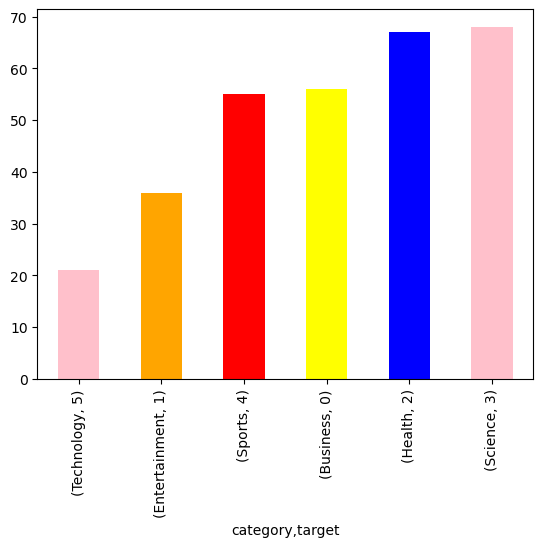

In [58]:
final_news_df.groupby('category').target.value_counts().sort_values().plot(kind='bar', color = ["pink", "orange", "red", "yellow", "blue"])
plt.show()

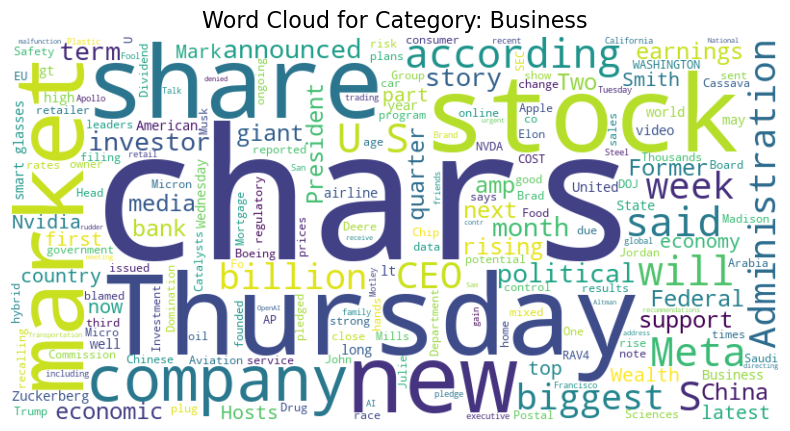

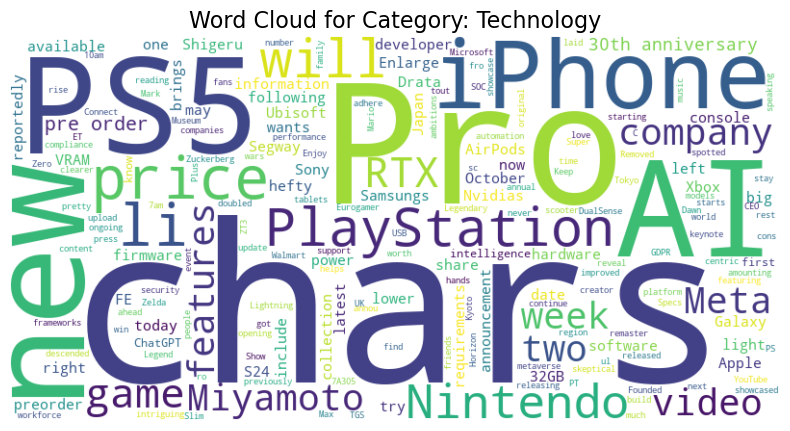

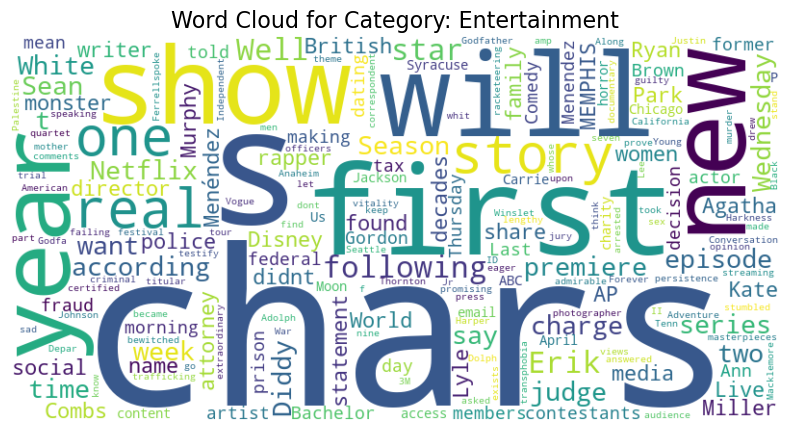

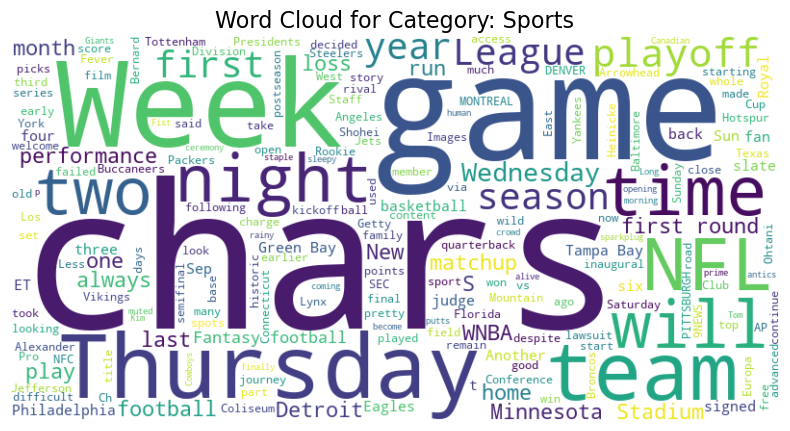

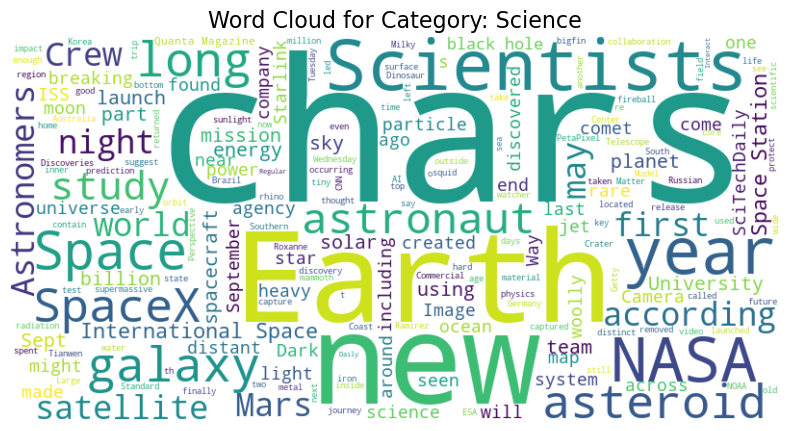

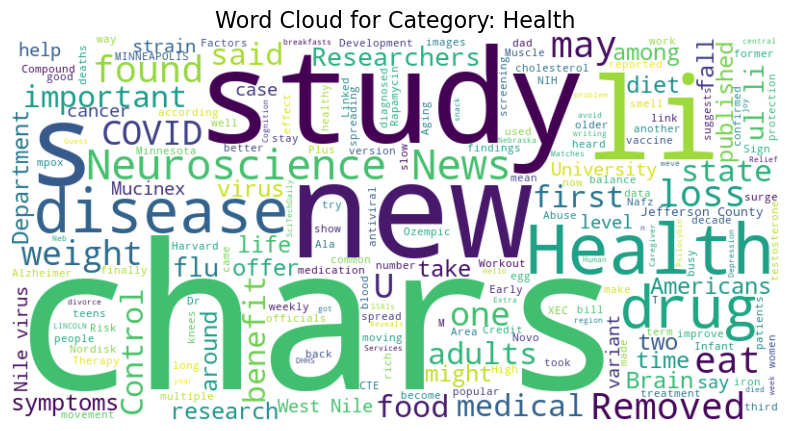

In [60]:
from wordcloud import WordCloud
# Iterate through each unique category and generate a word cloud
for category in final_news_df['category'].unique():
    # Filter the DataFrame for the specific category
    category_texts = final_news_df[final_news_df['category'] == category]['news_text']
    
    # Combine all news texts into a single string
    text = ' '.join(category_texts)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'Word Cloud for Category: {category}', fontsize=16)
    plt.show()

## Data Cleaning

In [62]:
#Remove tags
import re
final_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   303 non-null    object
 1   news_id    303 non-null    object
 2   news_text  303 non-null    object
 3   url        303 non-null    object
 4   image_url  250 non-null    object
 5   target     303 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 14.3+ KB


In [63]:
def remove_tags(text):
    remove = re.compile(r'<.*?>')
    return re.sub(remove, '', text)


final_news_df['news_text'] = final_news_df['news_text'].apply(remove_tags)  
print("Tags Removed")

Tags Removed


In [66]:
# Remove Sepecial characters
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [68]:
def remove_special(text):
    spe_chars= string.punctuation
    for char in spe_chars:
            text = text.replace(char, '')
    return text
final_news_df['news_text'] = final_news_df['news_text'].apply(remove_special)  
print("Special Characters Removed")       

Special Characters Removed


In [70]:
# Convert Everything in Lower Case
def convert_lc(text):
    return text.lower()
final_news_df['news_text'] = final_news_df['news_text'].apply(convert_lc)  
print("Changed to lower case")     

Changed to lower case


In [71]:
#Remove all Stopwords
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anithabalachandran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    # Split the text into words, remove stopwords, and join them back into a string
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])
final_news_df['news_text'] = final_news_df['news_text'].apply(remove_stopwords)  
print("Stopwords Removed")  

Stopwords Removed


In [73]:
#Lemmatizing the Words

import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anithabalachandran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize words
def lemmatize_text(text):
    # Split the text into words, lemmatize each word, and join them back into a string
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

final_news_df['news_text'] = final_news_df['news_text'].apply(lemmatize_text)  
print("Lemmatized")  

Lemmatized


In [78]:
final_news_df[['category', 'target','news_text']]

,category,target,news_text
0,Business,0,national transportation safety board thursday ...
1,Business,0,allhands meeting thursday openai ceo sam altma...
2,Business,0,micron share soar earnings chinese stock rally...
3,Business,0,thousand dockworker every major east gulf coas...
4,Business,0,one biggest investor trump medium amp technolo...
...,...,...,...
298,Health,2,exercising weight lifting one effective way bo...
299,Health,2,new study published scientific report shed lig...
300,Health,2,minneapolis — typically rare disease declared ...
301,Health,2,around 40 adult u obese new data center diseas...


In [ ]:
Data Preparation

In [88]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Prepare the target variable (y) from 'target' column
y = np.array(final_news_df['target'].values)

# Initialize CountVectorizer to convert 'news_text' to feature vectors
cv = CountVectorizer(max_features=5000)

# Transform 'news_text' into a numerical array (X)
X = cv.fit_transform(final_news_df['news_text']).toarray()

# Print shapes of X and y
print("X.shape = ", X.shape)
print("y.shape = ", y.shape)


X.shape =  (303, 3250)
y.shape =  (303,)


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 3250)
(242,)
(61, 3250)
(61,)


In [90]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Train the model on the training data
mnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mnb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a classification report to see detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print a confusion matrix to understand the performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 63.93%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.75      0.33      0.46         9
           2       0.79      0.69      0.73        16
           3       0.65      0.85      0.73        13
           4       0.60      0.75      0.67         8
           5       0.50      0.20      0.29         5

    accuracy                           0.64        61
   macro avg       0.63      0.59      0.58        61
weighted avg       0.66      0.64      0.62        61

Confusion Matrix:
 [[ 7  1  0  2  0  0]
 [ 1  3  1  0  3  1]
 [ 2  0 11  2  1  0]
 [ 0  0  2 11  0  0]
 [ 1  0  0  1  6  0]
 [ 3  0  0  1  0  1]]


In [91]:
from sklearn.model_selection import GridSearchCV

# Define the parameters to tune
parameters = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}  # You can try different values of alpha

# Initialize GridSearchCV with MultinomialNB and parameters
grid_search = GridSearchCV(MultinomialNB(), parameters, cv=5, scoring='accuracy')

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_mnb = grid_search.best_estimator_

# Predict on the test data
y_pred = best_mnb.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Improved Accuracy: {accuracy * 100:.2f}%')


Best Parameters: {'alpha': 1.0}
Improved Accuracy: 63.93%
